In [15]:
import requests
from bs4 import BeautifulSoup
import json
import re
import sys
import time
import random
import pandas as pd
import pymysql

def get_news(n_url):
    news_detail = []
    print(n_url)
    breq = requests.get(n_url, headers={'User-Agent':'Mozilla/5.0'})
    bsoup = BeautifulSoup(breq.content, 'html.parser')

    # news text
    _text = bsoup.select('#newsct_article')[0].get_text().replace('\n', " ")
    btext = _text.replace("// flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}", "")
    news_detail.append(btext.strip())


    return news_detail


columns = ['내용']
df = pd.DataFrame(columns=columns)

query = '코로나'   # url 인코딩 에러는 encoding parse.quote(query)
s_date = "2022.06.01"
e_date = "2022.06.04"
s_from = s_date.replace(".", "")
e_to = e_date.replace(".", "")
page = 1


while True:
    time.sleep(random.sample(range(3), 1)[0])
    print(page)

    url = "https://search.naver.com/search.naver?where=news&query=" + query + \
        "&sort=1&field=1&ds=" + s_date + "&de=" + e_date + \
        "&nso=so%3Ar%2Cp%3Afrom" + s_from + "to" + e_to + \
        "%2Ca%3A&start=" + str(page)
    
    
    header = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }

    req = requests.get(url, headers=header)
    print(url)
    cont = req.content
    soup = BeautifulSoup(cont, 'html.parser')


    naver_news = soup.find_all("a", {"class": "info"})
    if naver_news == []:
        break


    for a_tag in naver_news:
        try:
            news_url = a_tag.attrs["href"]
            if news_url.startswith("https://news.naver.com"):
                print(news_url)
                news_detail = get_news(news_url)
                print(news_detail)
                df = df.append(pd.DataFrame(
                   [[news_detail[0]]], columns=columns))
        except Exception as e:
            print(e)
            continue
    break
    
    page += 10


# print(soup.select_one('.tit_view').get_text())
df

1
https://search.naver.com/search.naver?where=news&query=코로나&sort=1&field=1&ds=2022.06.01&de=2022.06.04&nso=so%3Ar%2Cp%3Afrom20220601to20220604%2Ca%3A&start=1
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=104&oid=214&aid=0001200757
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=104&oid=214&aid=0001200757
['사진제공 : 연합뉴스북한이 중국과 인접한 접경도시인 신의주에서 코로나19 집단 감염이 발생했던 사실이 처음 공개했습니다.평안북도 신의주에 위치한 \'신의주은하타올공장\'관계자는 오늘 조선중앙TV를 통해 방송된 인터뷰에서 "지난달 12일부터 공장 종업원 수의 40%에 해당하는 발열환자가 발생했었다"고 말했습니다.지난달 12일은 북한 당국이 공식적으로 북한 내 코로나 환자 발생사실을 처음 인정한 날로, 이때 이미 신의주에서 집단 감염이 발생한 사실이 공장 관계자의 인터뷰를 통해 새롭게 알려진 것입니다.다만 이 관계자는 지금은 발열환자수가 5명 미만으로 감소했다며 생산활동을 계속 진행할 수 있도록 하루 네 차례 소독사업을 하고 있다고 설명했습니다.오늘 조선중앙TV가 공개한 지역별 발열환자 규모 또한 주목을 끌었습니다.어제 오후 6시 기준으로 평안북도 내 치료 중인 환자는 3만906명으로 다른 지역에 비해 압도적으로 많았습니다.신규 발열환자 수도 다른 지역은 대체로 1만명을 밑도는 반면 평안북도는 1만7천827명으로 집계돼 가장 많았습니다.통계대로라면 중국과 접한 평안북도에서 코로나 상황이 지금도 가장 심각한 것입니다.북한은 지난달 12일 처음 코로나 환자 발생사실을 인정한 뒤, 지금까지 코로나 감염으로 의심되는 누적 발열환자가 399만6천 여명 발생했다고 설명했습니다.또 누

/tmp/ipykernel_581/1998481490.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(


['포르투갈 리스본 시내에서 트램을 타고 이동하는 사람들. /사진=AFP독일과 포르투갈을 중심으로 유럽에서 신종 코로나바이러스 감염증(코로나19) 오미크론 하위변이인 BA.5 감염이 늘고 있다.3일(현지시간) 영국 일간 가디언은 포르투갈 국립보건원 통계를 바탕으로 신규 감염자의 약 87%가 BA.5 감염자라고 보도했다.보도에 따르면 지난 1일 코로나19 신규 확진자는 2만6848명, 사망자는 47명으로 올해 2월17일(51명) 이후 가장 많은 사망자가 나왔다.포르투갈은 지난 4~5월이 코로나19 6차 대유행으로, 이 기간 모두 1455명이 코로나19로 사망했다. 최근 7일간 인구 100만명당 감염자 수는 2888명이었다.이 같은 추세는 프랑스, 영국, 스페인과 대조적 상황이다. 이들 국가에서는 최근 두 달간 코로나19 감염률 감소세를 보인다.프랭크 울리히 몽고메리 세계의학협회장은 "포르투갈 사례가 보여주듯 코로나19 유행은 아직 끝나지 않았다"고 강조했다.비중이 낮은 편이긴 하지만 독일에서도 BA.5 감염자가 증가하는 추세다.독일의 질병관리청 격인 로버트코흐연구소 집계에 따르면 BA.5 감염자 비율은 4월 말 0.2%에서 5월22일 5.2%로, 매주 약 2배씩 높아졌다.지난 2일 기준 독일의 신규 확진자는 4만6327명, 사망자는 124명이었다.이보배 한경닷컴 객원기자 newsinfo@hankyung.com']
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=421&aid=0006139539
https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=421&aid=0006139539


/tmp/ipykernel_581/1998481490.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(


['조선중앙TV "신의주 타월 공장 종업원 40%가 한때 발열자"북중 물자교류 과정에서 코로나19 유입됐을 가능성 여전    북한의 신의주와 중국 단둥을 잇는 \'조중우의교\'의 모습. © AFP=뉴스1 © News1 우동명 기자(서울=뉴스1) 서재준 기자 = 북한의 신종 코로나바이러스 감염증(코로나19) 유입 경로가 아직 밝혀지지 않은 가운데 중국과의 접경 도시로 물자교류 창구인 신의주의 공장에서 \'집단 발열\'이 있었던 것으로 4일 확인됐다.이날 조선중앙TV에 출연한 신의주의 \'신의주은하타올(월)공장\' 관계자는 "지난달 12일부터 공장 종업원 수의 40%가 해당하는 유열자(발열자)가 발생했다"라고 말했다.이 관계자는 발열자 수가 지금은 5명 미만으로 감소됐다며 관련 상황에 대한 대응과 통제가 성공적으로 이뤄졌음을 시사했다.신의주는 압록강을 사이에 두고 중국의 단둥과 맞닿은 도시로 북한과 중국은 이곳에 설치된 \'조(북)중우의교\'를 오가는 열차로 무역을 진행해왔다.북한은 지난 2020년 2월 이후 중단했던 물자교류를 지난 1월 재개했는데, 중국에서 코로나19가 재확산된 뒤 북한에서도 코로나19가 발생했다는 점에서 이곳이 코로나19의 유입 경로로 지목되기도 했다.특히 이날 TV에 출연한 관계자가 공장의 코로나19 유증상자인 발열자의 발생 시점을 북한이 코로나19 확진자 발생을 처음 발표한 5월12일로 지목한 것도 주목할 부분이다. 이번 사태의 초기단계 때 신의주에 \'집단 감염\'이 발생했음을 알 수 있기 때문이다.다만 북한은 코로나19의 유입 경로에 대해서는 아직 공식적으로 밝히지 않고 있다. 또 코로나19의 발생 시점을 \'4월 말\'이라고 밝힌 바 있기도 하다.북한은 코로나19 \'유증상자\'를 발열자로 부르고 있는 것으로 분석되고 있다. 때문에 이 공장에 코로나19 변이 바이러스의 \'확진자\'가 발생했는지 여부는 단언하긴 어렵다. 일각에서는 이 공장 외에도 집단 감염 사례가 있을 것으로 보고 있다.북한은 연일 코로나19 방역의 안정세를 강조하고

/tmp/ipykernel_581/1998481490.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(


,내용
0,사진제공 : 연합뉴스북한이 중국과 인접한 접경도시인 신의주에서 코로나19 집단 감염...
0,포르투갈 리스본 시내에서 트램을 타고 이동하는 사람들. /사진=AFP독일과 포르투갈...
0,"조선중앙TV ""신의주 타월 공장 종업원 40%가 한때 발열자""북중 물자교류 과정에서..."


In [16]:
get_news("https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003702192")

https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003702192


['대구 동구 신서동에 있는 신약개발지원센터 전경. 케이메디허브 제공    케이메디허브(대구경북첨단의료산업진흥재단)는 의료기업 이뮨메드와 공동연구로 신종 코로나바이러스 감염증(코로나19) 섬유화와 관련한 신규 치료 기전 유효물질을 개발했다고 3일 밝혔다.   연구진이 개발한 합성된 저분자 화합물은 항코로나19 바이러스 세포실험에서 렘데시비르 포함 3종의 대조 약물보다 우수한 치료효과와 낮은 독성을 나타냈다고 케이메디허브 측은 설명했다.   개발한 약물들은 신규 기전의 분자를 타깃으로 각각 적응증에 대한 후보물질 도출을 목표로 화합물의 최적화를 진행하고 있어 코로나19를 포함한 바이러스 치료제와 항섬유화 혁신신약 개발에 대한 기대를 높이고 있다.   케이메디허브는 앞으로 이뮨메드와 공동으로 국가과제지원 등 전임상 개발 지원 등을 통해 코로나19 바이러스 치료제와 항섬유화 신약 개발에 박차를 가할 예정이다.   양진영 케이메디허브 이사장은 “이번 성과는 선행연구 분석과 화합물의 정교한 디자인을 통해 얻은 유효물질들로 기존 라이브러리 검색보다 시간과 비용을 획기적으로 절감했다는 점에서 의미가 크다"면서 "앞으로도 기업들과 협업해 혁신 신약 개발 역량을 집중해 나갈 계획”이라고 말했다.']

In [17]:
df.to_csv('news_text.txt')

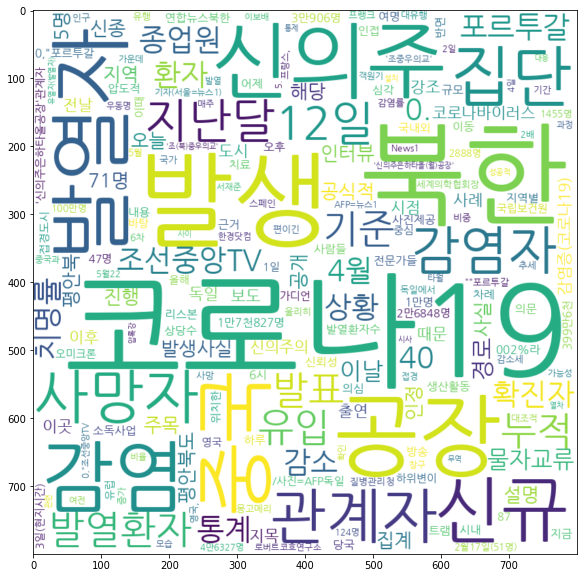

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter


import pandas as pd
from konlpy.tag import Hannanum
# wordcloud 그리기
hannanum = Hannanum()

f = open('news_text.txt', 'r', encoding='UTF8')
lines = f.readlines()
f.close()


def flatten(l):
        flatList = []
        for elem in l:
            if type(elem) == list:
                for e in elem:
                    flatList.append(e)
            else:
                flatList.append(elem)
        return flatList



# 한나눔 형태소 분석기로 명사만 추출
# 한국어 분석을 할 때는 명사 추출 분석이 가장 일반적임
temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))
    
word_list = flatten(temp)
word_list = pd.Series([x for x in word_list if len(x) > 1])
# word_list.value_counts().head(10)

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width=800,
    height=800,
    background_color="white")

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
fig.savefig('wordcloud2.png')


